# Kaggle House Price Prediction Project: Young Min Cho + Alexander Sigman

### Initialize

[Feature Engineering: 7 types of data](https://towardsdatascience.com/7-data-types-a-better-way-to-think-about-data-types-for-machine-learning-939fae99a689)

# 0. SET UP

In [138]:
# Initializing

# data processing. pandas as alias pd
import pandas as pd 
# linear algebra. numpy as alias np
import numpy as np 

# If you're working with a notebook, don't forget to use Matplotlib magic! 
%matplotlib inline
# matlab-style plotting
import matplotlib.pyplot as plt 
import seaborn as sns
color = sns.color_palette()
# Set the Seaborn theme if desired
sns.set_style("darkgrid")

# ignore sklearn & seaborn warnings
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 

#for some statistics
from scipy import stats
from scipy.stats import norm, skew  #ex. sns(fit = norm)


# Format scientific notation from pandas aggregation
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000) 

In [139]:
# import csv to train and test datasets in pandas dataframe
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv("./data/test.csv") 

In [140]:
test_df.shape

(1459, 80)

In [141]:
import re
with open('./data/DataDocumentation.txt', 'r',encoding='cp1252') as file:
    lines = file.readlines()
    
nominal = []
ordinal = []
continuous = []
discrete = []
for line in lines:
    if re.findall('(Nominal)', line):
        nominal.append(re.sub(' ', '', re.split('\(Nominal\)', line)[0].strip()))
    elif re.findall('(Ordinal)', line):
        ordinal.append(re.sub(' ', '', re.split('\(Ordinal\)', line)[0].strip()))
    elif re.findall('(Continuous)', line):
        continuous.append(re.sub(' ', '', re.split('\(Continuous\)', line)[0].strip()))
    elif re.findall('(Discrete)', line):
        discrete.append(re.sub(' ', '', re.split('\(Discrete\)', line)[0].strip()))
nominal = np.array(nominal)
nominal = np.delete(nominal, [0]) # Drop ID
nominal[13] = 'Exterior1st'       # Update Exterior1 to Exterior1st
nominal[14] = 'Exterior2nd'
ordinal = np.array(ordinal)
continuous = np.array(continuous)
continuous[15] = '3SsnPorch'
discrete = np.array(discrete)
discrete[2] = 'YearRemodAdd'
discrete[7] = 'BedroomAbvGr'
discrete[8] = 'KitchenAbvGr'
discrete = np.delete(discrete, [0]) # Drop Order 

In [90]:
continuous

array(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice'], dtype='<U13')

Dropping ID column

In [142]:
# Dropping ID COLUMN --------------------------------------------------------------------------------------------------

#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train_df.shape))
print("The test data size before dropping Id feature is : {} ".format(test_df.shape))

#Save the 'Id' column
train_ID = train_df['Id']
test_ID = test_df['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
print("\n ----------ID column dropped both for train & test----------")
train_df.drop("Id", axis = 1, inplace = True)
test_df.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train_df.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test_df.shape)) 

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

 ----------ID column dropped both for train & test----------

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


In [31]:
# train.describe()
# train.dtypes
# train.info()
# train.Alley 

## 1. Simple EDA on Train Dataset

In [143]:
### Copying Feature Engineering from below.......

train_df['HalfBath'].describe()
train_df['HalfBath'].value_counts() 
#all bathrooms 
train_df['Num_Bathrooms'] = train_df['FullBath'] + 0.5 * train_df['HalfBath'] + train_df['BsmtFullBath'] + 0.5 * train_df['BsmtHalfBath']
#total area of external structures 
train_df['ExtStructSF'] =  train_df['WoodDeckSF'] + train_df['OpenPorchSF'] + train_df['EnclosedPorch'] + train_df['3SsnPorch'] + train_df['ScreenPorch']

#total house area 
train_df['HouseSF'] = train_df['TotalBsmtSF'] + train_df['GrLivArea'] + train_df['GarageArea']  

#### EDA PURPOSE----------------------------------------- uncomment to graph

In [33]:
# #mapping nominal rankings to numerical for different features:  

# mp = {'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0}
# train_df['ExterQual'] = train_df['ExterQual'].map(mp)
# train_df['ExterCond'] = train_df['ExterCond'].map(mp)
# train_df['HeatingQC'] = train_df['HeatingQC'].map(mp)
# train_df['KitchenQual'] = train_df['KitchenQual'].map(mp)

**The Kernel need to be restarted if above block is ran**

In [34]:
# for i, col in enumerate(float_col):
#     plt.figure(i)
#     sns.regplot(x=col, y='SalePrice', data=train_df)
#     plt.show()

----------------------------------------------------------------------------------

correlation(train_df) vs SalePrice

In [35]:
# correlation matrix against the Target Variable: using train_DF
corr_matrix = train_df.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)


SalePrice        1.000
HouseSF          0.808
OverallQual      0.791
GrLivArea        0.709
GarageCars       0.640
Num_Bathrooms    0.632
GarageArea       0.623
TotalBsmtSF      0.614
1stFlrSF         0.606
FullBath         0.561
TotRmsAbvGrd     0.534
YearBuilt        0.523
YearRemodAdd     0.507
GarageYrBlt      0.486
MasVnrArea       0.477
Fireplaces       0.467
ExtStructSF      0.391
BsmtFinSF1       0.386
LotFrontage      0.352
WoodDeckSF       0.324
2ndFlrSF         0.319
OpenPorchSF      0.316
HalfBath         0.284
LotArea          0.264
BsmtFullBath     0.227
BsmtUnfSF        0.214
BedroomAbvGr     0.168
ScreenPorch      0.111
PoolArea         0.092
MoSold           0.046
3SsnPorch        0.045
BsmtFinSF2      -0.011
BsmtHalfBath    -0.017
MiscVal         -0.021
LowQualFinSF    -0.026
YrSold          -0.029
OverallCond     -0.078
MSSubClass      -0.084
EnclosedPorch   -0.129
KitchenAbvGr    -0.136
Name: SalePrice, dtype: float64

# 2. Removing Outliers: using Simple Linear Regression
Our Feature Engineered Variable, "HouseSF" has very high correlation to our target variable. <br>
Therefore, we have removed the top 12 outliers

In [144]:
from sklearn import linear_model
ols = linear_model.LinearRegression()
## fit your linear model with fit() function
ols.fit(train_df[['HouseSF']], train_df['SalePrice'])
rss = (train_df['SalePrice']-ols.predict(train_df[['HouseSF']])) 

In [145]:
rss.sort_values(ascending=False).head(10).index
train_df = train_df.drop(train_df.index[[691, 898, 1182, 803, 1169, 1046, 688, 769, 1181, 440]])
train_df=train_df[train_df['HouseSF']<8000] 

## Getting Ready for 'Real' Feature Engineering

combine Train and Test for bigger dataset

In [146]:
### COMBINING TRAIN AND TEST[- Response] FOR BIGGER DATASET ----------------------------------------------------------------

# a) get row numbers for both
rntrain = train_df.shape[0]
rntest = test_df.shape[0]
# b) store Y
y_train = train_df.SalePrice.values
#c) concat train & test
all_data = pd.concat((train_df,test_df)).reset_index(drop=True) #make sure to reset index, because they will be overlapped
#d) drop target value
all_data.drop(['SalePrice'], axis=1, inplace=True)  # axis=1 & inplace=True; to make it have impact

print("Size of all_data : {} rows and {} columns".format(all_data.shape[0], all_data.shape[1]))  

Size of all_data : 2907 rows and 82 columns


In [147]:
all_data.sample(10) 

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond BsmtExposure  BsmtFinSF1  BsmtFinSF2 BsmtFinType1 BsmtFinType2  BsmtFullBath  BsmtHalfBath BsmtQual  BsmtUnfSF CentralAir Condition1 Condition2 Electrical  EnclosedPorch  ExtStructSF ExterCond ExterQual Exterior1st Exterior2nd Fence FireplaceQu  Fireplaces Foundation  FullBath Functional  GarageArea  GarageCars GarageCond GarageFinish GarageQual GarageType  GarageYrBlt  GrLivArea  HalfBath Heating HeatingQC  HouseSF HouseStyle  KitchenAbvGr KitchenQual LandContour LandSlope  LotArea LotConfig  LotFrontage LotShape  LowQualFinSF  MSSubClass MSZoning  MasVnrArea MasVnrType MiscFeature  MiscVal  MoSold Neighborhood  Num_Bathrooms  OpenPorchSF  OverallCond  OverallQual PavedDrive  PoolArea PoolQC RoofMatl RoofStyle SaleCondition SaleType  ScreenPorch Street  TotRmsAbvGrd  TotalBsmtSF Utilities  WoodDeckSF  YearBuilt  YearRemodAdd  YrSold
271       1363         0          0   NaN             2     1Fam       TA           Gd     226.000    1063.000          LwQ          GLQ         1.000         0.000       Gd     96.000          Y       Norm       Norm      SBrkr              0       81.000        TA        TA     Plywood     Plywood   NaN          TA           2     CBlock         1        Mod     439.000       2.000         TA          Unf         TA     Attchd     1954.000       1363         0    GasA        Ex 3187.000     1Story             1          TA         Low       Sev    39104   CulDSac       73.000      IR1             0          20       RL       0.000       None         NaN        0       4      ClearCr          2.000            0            7            7          Y         0    NaN  Membran      Flat        Normal       WD            0   Pave             5     1385.000    AllPub          81       1954          2005    2008
1317       955       677          0   NaN             3     1Fam       TA           No       0.000       0.000          Unf          Unf         0.000         0.000       Gd    935.000          Y       Norm       Norm      SBrkr              0       28.000        TA        TA     VinylSd     VinylSd   NaN          TA           1      PConc         2        Typ     462.000       2.000         TA          Fin         TA     Attchd     1998.000       1632         1    GasA        Gd 3029.000     2Story             1          TA         Lvl       Gtl     9084    Inside       63.000      IR1             0          60       RL       0.000       None         NaN        0       6      Gilbert          2.500           28            5            7          Y         0    NaN  CompShg       Hip        Normal       WD            0   Pave             8      935.000    AllPub           0       1998          1998    2006
709        960         0          0   NaN             3   2fmCon       TA           Av     789.000       0.000          ALQ          Unf         1.000         0.000       TA    171.000          N       RRAn       Norm      SBrkr              0      288.000        TA        TA     HdBoard     HdBoard   NaN         NaN           0     CBlock         1        Typ     576.000       2.000         TA          Unf         TA     Detchd     1970.000        960         0    GasW        TA 2496.000     1Story             1          TA         Lvl       Gtl     9873    Inside       60.000      Reg             0         190       RL     160.000    BrkFace         NaN        0       5      BrkSide          2.000          288            5            4          Y         0    NaN  CompShg     Gable        Normal       WD            0   Pave             6      960.000    AllPub           0       1970          1970    2006
397        876       936          0   NaN             4     1Fam       TA           No     540.000       0.000          ALQ          Unf         0.000         0.000       TA    324.000          Y       PosN       Norm      SBrkr              0      168.000        TA        TA     VinylSd     VinylSd   NaN          TA        

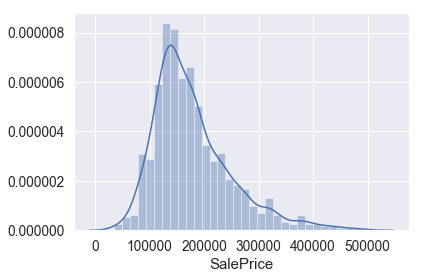

In [40]:
# Distribution Plot on Sales price: 
sns.distplot(train_df['SalePrice'])

In [41]:
#Correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True) 

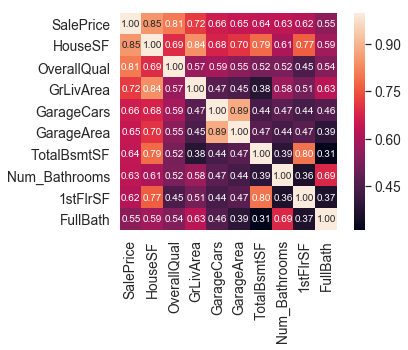

In [42]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show() 

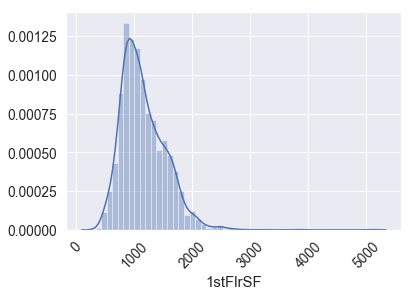

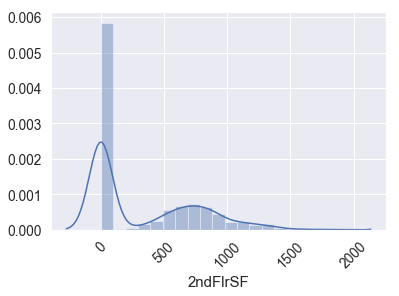

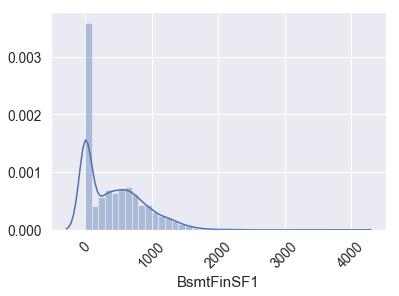

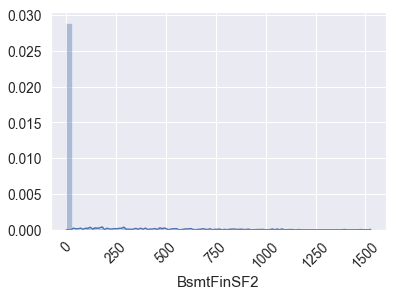

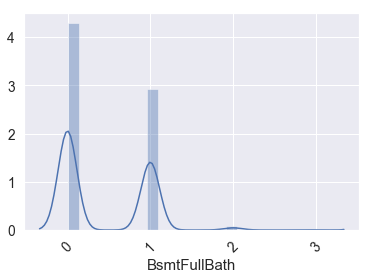

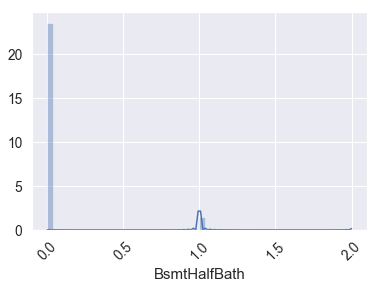

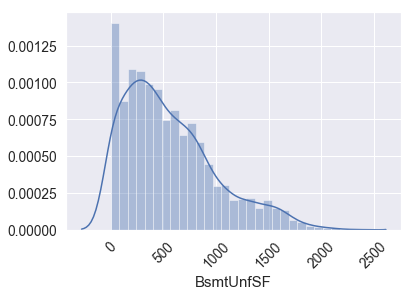

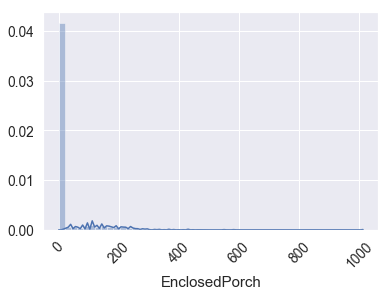

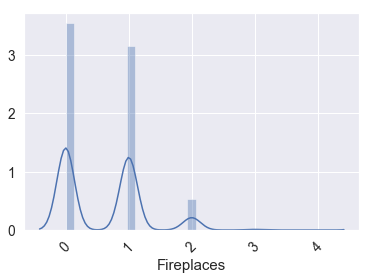

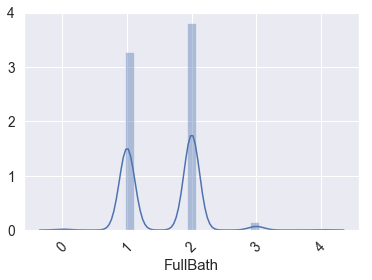

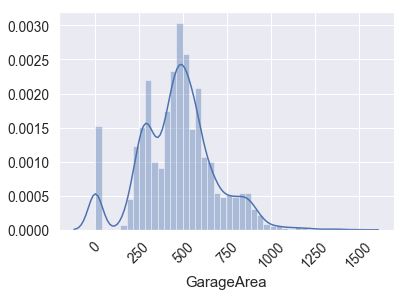

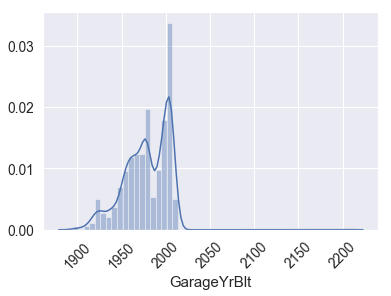

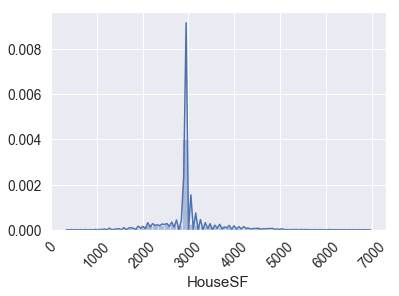

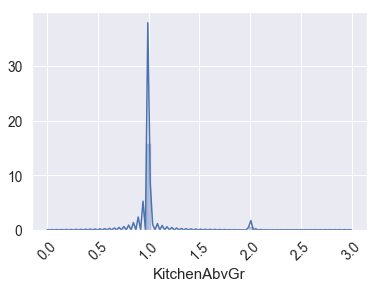

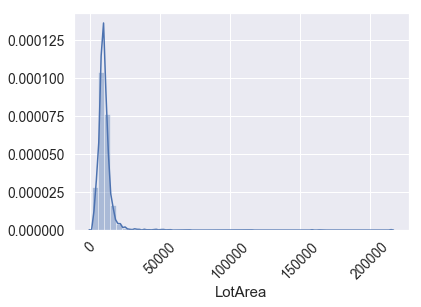

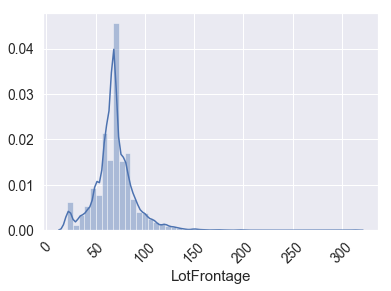

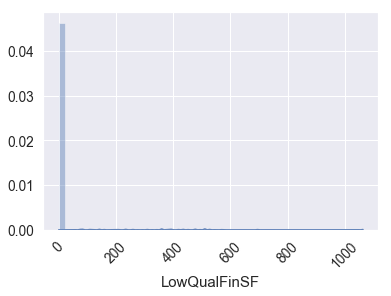

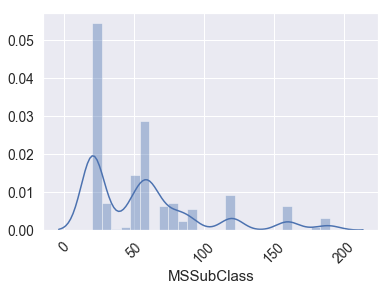

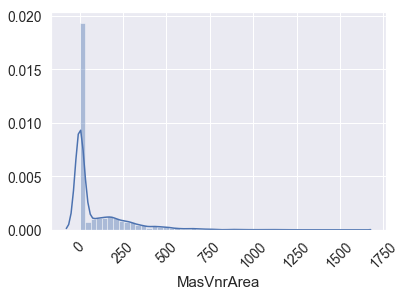

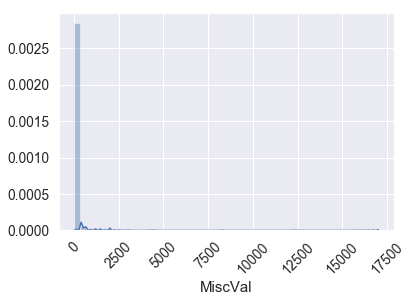

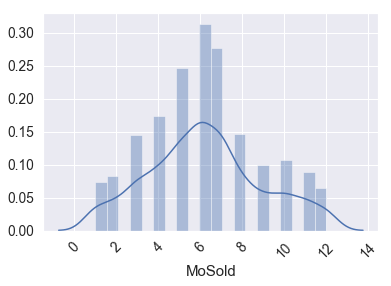

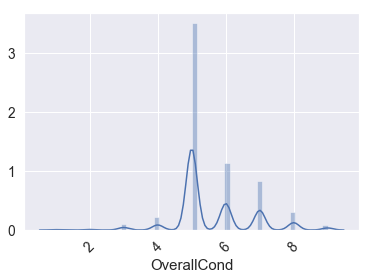

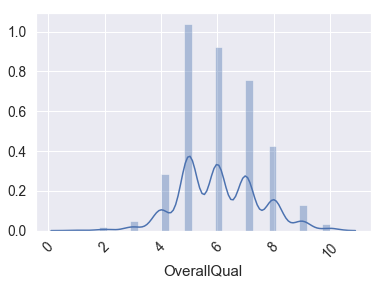

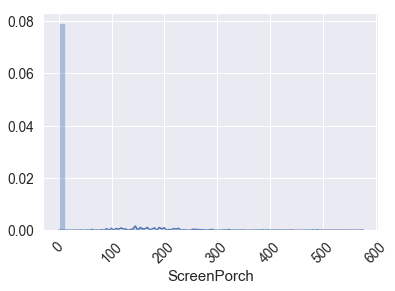

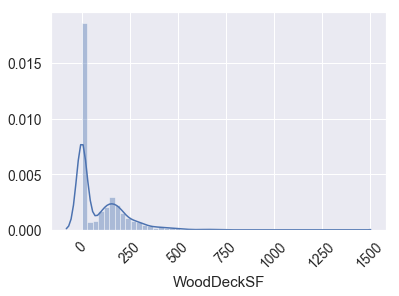

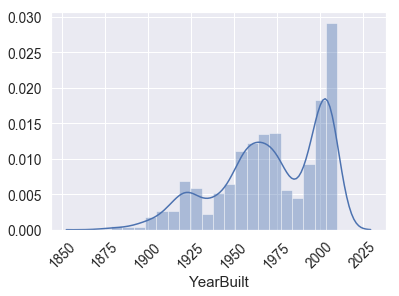

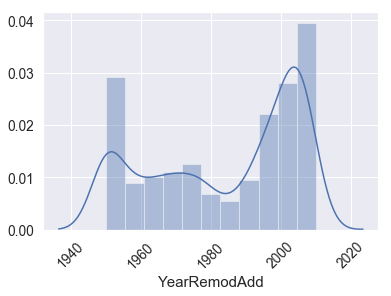

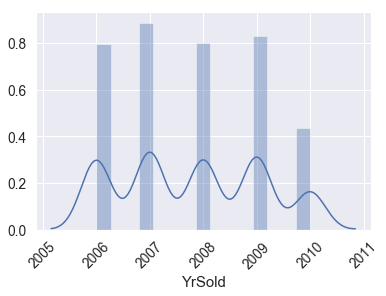

In [43]:
for i, col in enumerate(all_data.select_dtypes(['int64','float64']).columns):
    all_data[col].fillna(all_data[col].median(),inplace=True)
    plt.figure(i)
    ax = sns.distplot(all_data[col])
    plt.xticks(rotation=45)
    plt.show()  

In [44]:
### EXAMPLE of a PAIR PLOT

# sns.set()
# cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
# sns.pairplot(train_df[cols], size = 2.5)
# plt.show()

### Imputing values: 

In [148]:
# IMPUTATION BY MEDIAN



# continuous

all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))


# IMPUTATION BY 0 
# Both of these features have identical missing values. Also missing values on other Bsmt. Safely fill them with 0s
for col in ["BsmtFullBath",'BsmtHalfBath']:
    all_data[col].fillna(0, inplace = True)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)


    
    
#IMPUTATION BY NONE

all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")




# IMPUTATION BY MODE
all_data["Exterior1st"].fillna(all_data["Exterior1st"].mode()[0], inplace = True)
all_data["Exterior2nd"].fillna(all_data["Exterior2nd"].mode()[0], inplace = True)
# Nominal
all_data["Neighborhood"].fillna(all_data["Neighborhood"].mode()[0], inplace=True) 
# Nominal
all_data["KitchenQual"].fillna(all_data["KitchenQual"].mode()[0], inplace=True) 
# Nominal
all_data["MSZoning"].fillna(all_data["MSZoning"].mode()[0], inplace = True)
# Nominal
all_data["Functional"].fillna(all_data["Functional"].mode()[0], inplace=True) 
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])


### Identifying Missing Values

In [159]:
#missing data
total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)  

Total  Percent
SaleType           1    0.000
YearRemodAgg       0    0.000
Fireplaces         0    0.000
ExtStructSF        0    0.000
ExterCond          0    0.000
ExterQual          0    0.000
Exterior1st        0    0.000
Exterior2nd        0    0.000
Fence              0    0.000
FireplaceQu        0    0.000
Foundation         0    0.000
Electrical         0    0.000
FullBath           0    0.000
Functional         0    0.000
GarageArea         0    0.000
GarageCars         0    0.000
GarageCond         0    0.000
GarageFinish       0    0.000
GarageQual         0    0.000
EnclosedPorch      0    0.000

#### Removing Irrelevant/Skewed/Highly Correlated Features

In [150]:
# Dropping Features
all_data = all_data.drop("Utilities", axis=1)   # Skewed 100% -drop 

#all_data = all_data.drop("BsmtUnfSF", axis=1)  
#all_data = all_data.drop("MasVnrArea", axis=1)  
#all_data = all_data.drop("MasVnrType", axis=1)  
#all_data = all_data.drop("Exterior2nd", axis=1) # Correlated to Exterior1st -drop 
#all_data = all_data.drop("GarageCars", axis=1)  # Correlated to GarageArea Discrete
all_data = all_data.drop("SaleType", axis=1)    # Type of Sale depends on the buyer not the price  

## Feature Engineering: 

In [151]:
all_data['HalfBath'].describe()
all_data['HalfBath'].value_counts() 

#all bathrooms 
all_data['Num_Bathrooms'] = all_data['FullBath'] + 0.5 * all_data['HalfBath'] + all_data['BsmtFullBath'] + 0.5 * all_data['BsmtHalfBath']

#total area of external structures 
all_data['ExtStructSF'] =  all_data['WoodDeckSF'] + all_data['OpenPorchSF'] + all_data['EnclosedPorch'] + all_data['3SsnPorch'] + all_data['ScreenPorch']

#total house area 
all_data['HouseSF'] = all_data['TotalBsmtSF'] + all_data['GrLivArea']  + all_data['GarageArea']




In [152]:
# Create YearRemodAgg column to depcit better estimate between YearBuilt and YearRemodAdd
all_data['mean_year'] = all_data[['YearBuilt', 'YearRemodAdd']].mean(axis=1)
all_data['YearRemodAgg']=all_data[['YearBuilt', 'mean_year']].max(axis=1)   

In [153]:
# Drop 'mean_year','YearBuilt','YearRemodAdd': Since we have made a new YearRemodAgg Column
all_data.drop(['mean_year','YearBuilt','YearRemodAdd'],axis=1,inplace=True) 

In [154]:
ordinal

array(['LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence'],
      dtype='<U12')

In [155]:
from sklearn.preprocessing import LabelEncoder 

In [156]:
#mapping nominal rankings to numerical for different features:  
ordinal_rev = ['LotShape', 'LandSlope', 'OverallQual', 'OverallCond',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence']

 
for col in ordinal_rev: 
    lbl = LabelEncoder()
    lbl.fit(list(all_data[col].values)) 
    all_data[col] = lbl.transform(list(all_data[col].values))
    
    


In [ ]:
# float_col = float_col.drop('Num_Bathrooms',axis=1)
# float_col = float_col.drop('HouseSF',axis=1)
# float_col = float_col.drop('ExStructSF',axis=1)

In [ ]:
float_col = all_data.select_dtypes(['float64','int64'])


In [ ]:
float_col.columns

In [ ]:
sns.distplot(all_data['BsmtFinSF2']);

In [ ]:
all_data.columns

Make sure to work with Year Data

In [ ]:
# Drop columns that are already in use / low correlation between Target Variable (SalePrice): DO NOT DROP IN THIS VERSION

# all_data.drop(['1stFlrSF','2ndFlrSF','3SsnPorch','BedroomAbvGr','BsmtFinSF2','BsmtFullBath','BsmtHalfBath',
#  'EnclosedPorch','ExterCond','FullBath','HalfBath','KitchenAbvGr','LowQualFinSF','MoSold',
# 'OverallCond', 'YrSold','ExtStructSF'],axis=1,inplace=True) 

### Removing Low Corr. Categorical Variables

In [ ]:

# DO NOT DROP in this version 

# non_var_cols = ['LandSlope', 'Electrical', 'Functional', 'PavedDrive', 'Street', 'Condition1', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir']    
# all_data.drop(non_var_cols, axis = 1, inplace = True) #LandContour back in 


### Inspecting Remaining Nominal Categorical Variables 

In [ ]:
# sns.countplot on the Nominal Categorical Values to visualize
for i, col in enumerate(all_data.select_dtypes(['object']).columns):
    plt.figure(i)
    sns.countplot(x=col, data=all_data)
    plt.xticks(rotation=45)
    plt.show() 

In [ ]:
train_df.groupby('LandContour')['SalePrice'].mean()

In [ ]:
# There are outliers present in the training data
# GrLivArea: Above grade (ground) living area square feet
fig, ax = plt.subplots()
ax.scatter(x = train_df['LandContour'], y = train_df['SalePrice'], alpha = 0.6)
plt.ylabel('GarageArea', fontsize = 13)
plt.xlabel('GarageCars', fontsize = 13)
plt.show()

In [ ]:
#investigate mean sales price/neighborhood 

train_df.groupby('Neighborhood')['SalePrice'].agg('mean').plot('bar')

In [ ]:
#neighborhood sale price ranges boxplot 

f, ax = plt.subplots(figsize=(16, 12))
fig = sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = train_df) 
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=45)
plt.show()

### Dropping Nominal Categorical Variables that may have misrepresentation

In [78]:
# DO NOT DROP IN THIS VERSION


#all_data.drop(['BldgType','LotConfig', 'LandContour', 'MSSubClass','MSZoning','RoofStyle','SaleCondition'],axis=1,inplace=True)  

### Sanity check to ensure correct number of features is dropped 

In [157]:

all_data.shape

(2907, 80)

### Sum of NA values in all_data dataframe (should be 0)

In [162]:

sum(all_data.isnull().sum()) 

0

### Write all_data to csv pre-dummification (for tree-based models) 

In [163]:
all_data.to_csv('data/csv_versions/version4/all_data_no_dummies.csv', index = False)  

### Save train_y to csv: 

In [ ]:
#y_train = pd.DataFrame(y_train) 

In [ ]:
#y_train.to_csv('data/y_train.csv', index = False)

## Dummify remaining nominal categorical variables 

In [164]:
all_data_d = pd.get_dummies(all_data)  

In [165]:
all_data_d.sample(10)

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtCond  BsmtExposure  BsmtFinSF1  BsmtFinSF2  BsmtFinType1  BsmtFinType2  BsmtFullBath  BsmtHalfBath  BsmtQual  BsmtUnfSF  Electrical  EnclosedPorch  ExtStructSF  ExterCond  ExterQual  Fence  FireplaceQu  Fireplaces  FullBath  Functional  GarageArea  GarageCars  GarageCond  GarageFinish  GarageQual  GarageYrBlt  GrLivArea  HalfBath  HeatingQC  HouseSF  KitchenAbvGr  KitchenQual  LandSlope  LotArea  LotFrontage  LotShape  LowQualFinSF  MSSubClass  MasVnrArea  MiscVal  MoSold  Num_Bathrooms  OpenPorchSF  OverallCond  OverallQual  PavedDrive  PoolArea  PoolQC  ScreenPorch  TotRmsAbvGrd  TotalBsmtSF  WoodDeckSF  YrSold  YearRemodAgg  Alley_Grvl  Alley_None  Alley_Pave  BldgType_1Fam  BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  CentralAir_N  CentralAir_Y  Condition1_Artery  Condition1_Feedr  Condition1_Norm  Condition1_PosA  Condition1_PosN  Condition1_RRAe  Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  \
1701      1553         0          0             3         4             3     771.000     360.000             2             0         1.000         0.000         2    422.000           4              0          280          4          2      4            3           0         2           6     588.000       2.000           5             2           5     2003.000       1553         0          0 3694.000             1            2          0     8736       68.000         0             0          20       0.000        0       8          3.000           88            4            6           2         0       3            0             6     1553.000         192    2009      2003.500           0           1           0              1                0                0               0                0             0             1                  0                 0                1                0                0                0                0                0                0   
505       1065       846          0             3         4             3     380.000       0.000             2             6         0.000         0.000         2    397.000           4              0          263          4          2      4            5           1         2           6     471.000       2.000           5             2           5     1993.000       1911         1          0 3159.000             1            2          0     9554       80.000         0             0          60     125.000        0       9          2.500           81            4            7           2         0       3            0             8      777.000         182    2006      1993.500           0           1           0              1                0                0               0                0             0             1                  0                 0                1                0                0                0                0                0                0   
854        912       514          0             3         4             3       0.000       0.000             6             6         0.000         0.000         4    912.000           4              0          240          4          2      0            2           1         1           6     216.000       1.000           5             3           5     1925.000       1426         1          2 2554.000             1            2          0     7642       55.000         3             0          50       0.000        0       6          1.500          240            7            6           2         0       3            0             7      912.000           0    2007      1958.000           0           1           0              1                0                0               0                0             0             1                  0                 0                1                0                0                0                0                0                0   
2448       899       423  

In [166]:
#check dimensions of dummified df 

all_data_d.shape

(2907, 221)

## Write modified dataframe to CSV: 

In [167]:
all_data_d.to_csv('data/csv_versions/version4/all_data.csv', index = False)  